In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/COVID-19_Radiography_Dataset/Lung_Opacity.metadata.xlsx
/kaggle/input/COVID-19_Radiography_Dataset/Normal.metadata.xlsx
/kaggle/input/COVID-19_Radiography_Dataset/README.md.txt
/kaggle/input/COVID-19_Radiography_Dataset/COVID.metadata.xlsx
/kaggle/input/COVID-19_Radiography_Dataset/Viral Pneumonia.metadata.xlsx
/kaggle/input/COVID-19_Radiography_Dataset/Normal/images/Normal-859.png
/kaggle/input/COVID-19_Radiography_Dataset/Normal/images/Normal-158.png
/kaggle/input/COVID-19_Radiography_Dataset/Normal/images/Normal-10121.png
/kaggle/input/COVID-19_Radiography_Dataset/Normal/images/Normal-1811.png
/kaggle/input/COVID-19_Radiography_Dataset/Normal/images/Normal-97.png
/kaggle/input/COVID-19_Radiography_Dataset/Normal/images/Normal-1088.png
/kaggle/input/COVID-19_Radiography_Dataset/Normal/images/Normal-5663.png
/kaggle/input/COVID-19_Radiography_Dataset/Normal/images/Normal-6328.png
/kaggle/input/COVID-19_Radiography_Dataset/Normal/images/Normal-8410.png
/kaggle/input/COVID

# 1.Load data

In [4]:
path = "/kaggle/input/COVID-19_Radiography_Dataset"
data_dir = os.path.join(path)

In [5]:
import pandas as pd 

data = []
levels = ['Normal/images', 'COVID/images','Lung_Opacity/images','Viral Pneumonia/images']

for id, enumerate_level in enumerate(levels):
    files = os.listdir(os.path.join(data_dir, enumerate_level))
    split_index = int(0.25 * len(files))
    for file in files[:split_index]:
        data.append(['{}/{}'.format(enumerate_level, file), enumerate_level])

data = pd.DataFrame(data, columns=['image_file','result'])

In [6]:
data['result'] = data['result'].map({'Normal/images': 'Normal', 'COVID/images': 'COVID','Lung_Opacity/images':'Lung_Opacity','Viral Pneumonia/images':'Viral Pneumonia'})
data['path'] = path + '/' + data['image_file']

In [7]:
data.head(5)

image_file  result  \
0    Normal/images/Normal-859.png  Normal   
1    Normal/images/Normal-158.png  Normal   
2  Normal/images/Normal-10121.png  Normal   
3   Normal/images/Normal-1811.png  Normal   
4     Normal/images/Normal-97.png  Normal   

                                                path  
0  /kaggle/input/COVID-19_Radiography_Dataset/Nor...  
1  /kaggle/input/COVID-19_Radiography_Dataset/Nor...  
2  /kaggle/input/COVID-19_Radiography_Dataset/Nor...  
3  /kaggle/input/COVID-19_Radiography_Dataset/Nor...  
4  /kaggle/input/COVID-19_Radiography_Dataset/Nor...

# 1.Data Normalizatioon

In [8]:
import cv2
data['image'] = None

for i in range(0,len(data)):
    image_path = data['path'].iloc[i]
    image = cv2.imread(image_path)
    if image is not None:
        image=cv2.resize(image, (224, 224))
        image=np.asarray(image).astype('float32')
        normalized_image = image/255
        data.at[i, 'image'] = normalized_image

# 2.Data splitting

In [9]:
from sklearn.model_selection import train_test_split
y=data['result']
X=data['image']
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.3, stratify=y)

In [10]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(3703,) (1588,) (3703,) (1588,)


In [12]:
print("Image shape:",data['image'][0].shape)

Image shape: (224, 224, 3)


# 3. Model architecture & 4
Import one of these architectures with ImageNet pretrained weights: MobileNet,
MobileNetV2 (x0.25, x0.5, x0.75, and x1.0), EfficientNet-B0, ShuffleNetV2(x0.5, x0.1,
x1.5, and x2.0), ShuffleNetV2b (x0.5, x0.1, x1.5, and x2.0), MnasNet-B, MnasNet-A

4- Load the pretrained weights from ImageNet (you can use the kerascv library).

In [13]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(input_shape=(224, 224, 3),alpha=0.5, weights='imagenet', include_top=False)
base_model.summary()

#  alpha controls the number of filters in each layer

2025-04-16 17:08:21.372746: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744823301.613240      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744823301.683078      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0000 00:00:1744823315.211685      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1744823315.212540      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability:

3201480/3201480 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "mobilenetv2_0.50_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 16)   │            432 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 16)   │             64 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 16)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 16)   │            144 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 16)   │             64 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 16)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 8)    │            128 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 8)    │             32 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 48)   │            384 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 48)   │            192 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 48)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 48)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 48)     │            432 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 706,224 (2.69 MB)

 Trainable params: 687,680 (2.62 MB)

 Non-trainable params: 18,544 (72.44 KB)

# 5. 
Remove and replace the last fully connected layers by three fully connected layers
composed of 1024, 512, and c (Number of classes) neurons

In [14]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [15]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 16)   │            432 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 16)   │             64 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 16)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 16)   │            144 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 16)   │             64 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 16)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 8)    │            128 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 8)    │             32 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 48)   │            384 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 48)   │            192 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 48)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 48)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 48)     │            432 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,544,820 (9.71 MB)

 Trainable params: 2,526,276 (9.64 MB)

 Non-trainable params: 18,544 (72.44 KB)

In [16]:
X_train = np.array(X_train.tolist())
X_val = np.array(X_val.tolist())

In [18]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

num_classes = 4
y_traine = to_categorical(y_train_encoded, num_classes=num_classes)
y_vale = to_categorical(y_val_encoded, num_classes=num_classes)

# Training:

- **only the last three fully connected**

In [19]:
for layer in model.layers[:-3]:
    layer.trainable = False
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary(show_trainable=True)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)           ┃ Output Shape         ┃      Param # ┃ Connected to        ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer            │ (None, 224, 224, 3)  │            0 │ -                   │    -    │
│ (InputLayer)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ Conv1 (Conv2D)         │ (None, 112, 112, 16) │          432 │ input_layer[0][0]   │    N    │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ bn_Conv1               │ (None, 112, 112, 16) │           64 │ Conv1[0][0]         │    N    │
│ (BatchNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ Conv1_relu (ReLU)      │ (None, 112, 112, 16) │            0 │ bn_Conv1[0][0]      │    -    │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ expanded_conv_depthwi… │ (None, 112, 112, 16) │          144 │ Conv1_relu[0][0]    │    N    │
│ (DepthwiseConv2D)      │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ expanded_conv_depthwi… │ (None, 112, 112, 16) │           64 │ expanded_conv_dept… │    N    │
│ (BatchNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ expanded_conv_depthwi… │ (None, 112, 112, 16) │            0 │ expanded_conv_dept… │    -    │
│ (ReLU)                 │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ expanded_conv_project  │ (None, 112, 112, 8)  │          128 │ expanded_conv_dept… │    N    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ expanded_conv_project… │ (None, 112, 112, 8)  │           32 │ expanded_conv_proj… │    N    │
│ (BatchNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block_1_expand         │ (None, 112, 112, 48) │          384 │ expanded_conv_proj… │    N    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block_1_expand_BN      │ (None, 112, 112, 48) │          192 │ block_1_expand[0][… │    N    │
│ (BatchNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block_1_expand_relu    │ (None, 112, 112, 48) │            0 │ block_1_expand_BN[… │    -    │
│ (ReLU)                 │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block_1_pad            │ (None, 113, 113, 48) │            0 │ block_1_expand_rel… │    -    │
│ (ZeroPadding2D)        │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block_1_depthwise      │ (None, 56, 56, 48)   │          432 │ block_1_pad[0][0]   │    N    │
│ (DepthwiseConv2D)    

 Total params: 2,544,820 (9.71 MB)

 Trainable params: 1,838,596 (7.01 MB)

 Non-trainable params: 706,224 (2.69 MB)

In [21]:
import time
training_times = []
start=time.time()
history_last_three_fc = model.fit(X_train,y_traine,validation_data=(X_val,y_vale),epochs=20,batch_size=64)
end=time.time()
times=end-start
training_times.append(times)

Epoch 1/20


I0000 00:00:1744823393.387900     102 service.cc:148] XLA service 0x7a68e4002b90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744823393.389032     102 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1744823393.389054     102 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1744823394.350561     102 cuda_dnn.cc:529] Loaded cuDNN version 90300


 5/58 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.3772 - loss: 1.8149 

I0000 00:00:1744823399.208863     102 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


58/58 ━━━━━━━━━━━━━━━━━━━━ 31s 299ms/step - accuracy: 0.6240 - loss: 1.0553 - val_accuracy: 0.8098 - val_loss: 0.4891
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.8608 - loss: 0.3986 - val_accuracy: 0.8325 - val_loss: 0.4273
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.8832 - loss: 0.3052 - val_accuracy: 0.8445 - val_loss: 0.4075
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.9030 - loss: 0.2553 - val_accuracy: 0.8388 - val_loss: 0.4538
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9211 - loss: 0.2126 - val_accuracy: 0.8646 - val_loss: 0.3765
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9383 - loss: 0.1664 - val_accuracy: 0.8640 - val_loss: 0.4107
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9512 - loss: 0.1525 - val_accuracy: 0.8615 - val_loss: 0.3930
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9601 - loss: 0.1088 - val_accuracy: 0.8678 - val_loss: 

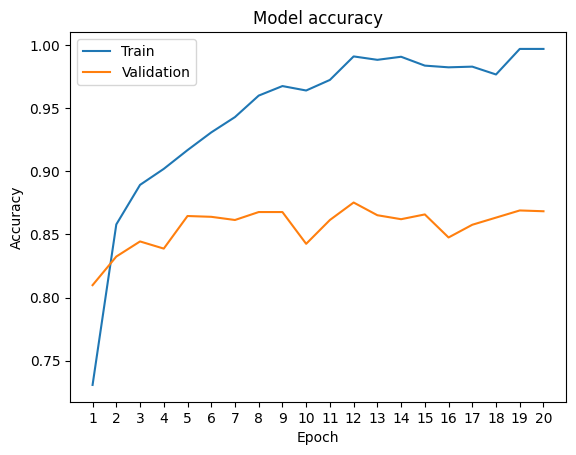

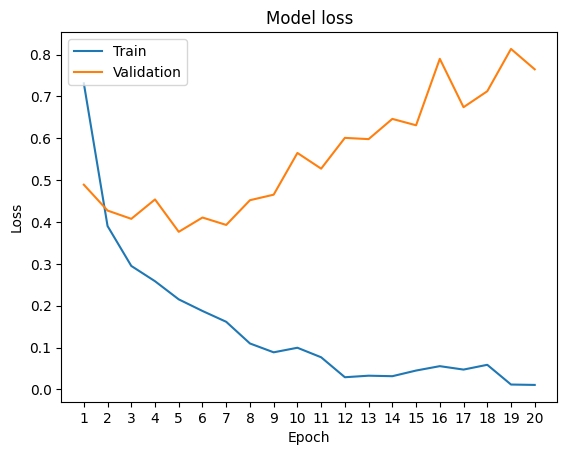

In [22]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values for all epochs
plt.plot(range(1, 21), history_last_three_fc.history['accuracy'])
plt.plot(range(1, 21), history_last_three_fc.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(range(1, 21))
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values for all epochs
plt.plot(range(1, 21), history_last_three_fc.history['loss'])
plt.plot(range(1, 21), history_last_three_fc.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(range(1, 21))
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [23]:
# Evaluation
from sklearn.metrics import classification_report

y_pred = model.predict(X_val)
c_pred = np.argmax(y_pred, axis=1)

c_pred_original = label_encoder.inverse_transform(c_pred)

print(classification_report(y_val, c_pred_original))


50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step
                 precision    recall  f1-score   support

          COVID       0.90      0.76      0.82       271
   Lung_Opacity       0.83      0.86      0.84       451
         Normal       0.87      0.92      0.89       765
Viral Pneumonia       0.96      0.84      0.89       101

       accuracy                           0.87      1588
      macro avg       0.89      0.84      0.86      1588
   weighted avg       0.87      0.87      0.87      1588



- **one convolutional layers + the last three fully connected**

In [25]:
for layer in model.layers:
    layer.trainable=False

In [27]:
for layer in model.layers[-7:]:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:

model.summary(show_trainable=True)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)           ┃ Output Shape         ┃      Param # ┃ Connected to        ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer            │ (None, 224, 224, 3)  │            0 │ -                   │    -    │
│ (InputLayer)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ Conv1 (Conv2D)         │ (None, 112, 112, 16) │          432 │ input_layer[0][0]   │    N    │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ bn_Conv1               │ (None, 112, 112, 16) │           64 │ Conv1[0][0]         │    N    │
│ (BatchNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ Conv1_relu (ReLU)      │ (None, 112, 112, 16) │            0 │ bn_Conv1[0][0]      │    -    │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ expanded_conv_depthwi… │ (None, 112, 112, 16) │          144 │ Conv1_relu[0][0]    │    N    │
│ (DepthwiseConv2D)      │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ expanded_conv_depthwi… │ (None, 112, 112, 16) │           64 │ expanded_conv_dept… │    N    │
│ (BatchNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ expanded_conv_depthwi… │ (None, 112, 112, 16) │            0 │ expanded_conv_dept… │    -    │
│ (ReLU)                 │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ expanded_conv_project  │ (None, 112, 112, 8)  │          128 │ expanded_conv_dept… │    N    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ expanded_conv_project… │ (None, 112, 112, 8)  │           32 │ expanded_conv_proj… │    N    │
│ (BatchNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block_1_expand         │ (None, 112, 112, 48) │          384 │ expanded_conv_proj… │    N    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block_1_expand_BN      │ (None, 112, 112, 48) │          192 │ block_1_expand[0][… │    N    │
│ (BatchNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block_1_expand_relu    │ (None, 112, 112, 48) │            0 │ block_1_expand_BN[… │    -    │
│ (ReLU)                 │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block_1_pad            │ (None, 113, 113, 48) │            0 │ block_1_expand_rel… │    -    │
│ (ZeroPadding2D)        │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block_1_depthwise      │ (None, 56, 56, 48)   │          432 │ block_1_pad[0][0]   │    N    │
│ (DepthwiseConv2D)    

 Total params: 2,544,820 (9.71 MB)

 Trainable params: 2,045,956 (7.80 MB)

 Non-trainable params: 498,864 (1.90 MB)

In [29]:
import time
start=time.time()
history_One_c = model.fit(X_train,y_traine,validation_data=(X_val,y_vale),epochs=20,batch_size=64)
end=time.time()
times=end-start
training_times.append(times)

Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 24s 232ms/step - accuracy: 0.8378 - loss: 1.3330 - val_accuracy: 0.7890 - val_loss: 0.6411
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9655 - loss: 0.0938 - val_accuracy: 0.7884 - val_loss: 0.8337
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.9778 - loss: 0.0607 - val_accuracy: 0.7720 - val_loss: 1.2713
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.9782 - loss: 0.0672 - val_accuracy: 0.7985 - val_loss: 0.9058
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.9832 - loss: 0.0698 - val_accuracy: 0.7802 - val_loss: 1.2589
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.9843 - loss: 0.0429 - val_accuracy: 0.8445 - val_loss: 0.7212
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.9815 - loss: 0.0530 - val_accuracy: 0.8042 - val_loss: 1.0813
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.9871 - loss: 0.0340 - val_accuracy: 0.8186 -

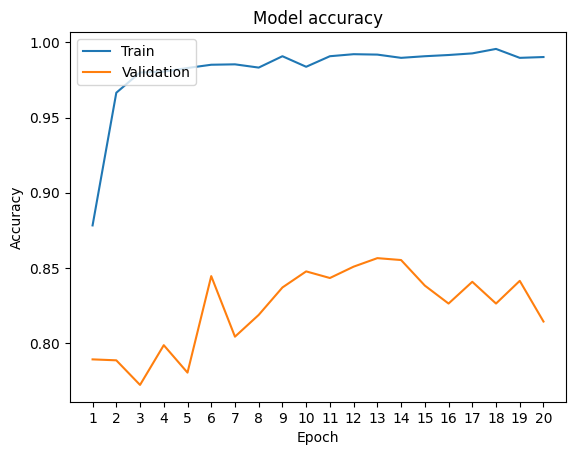

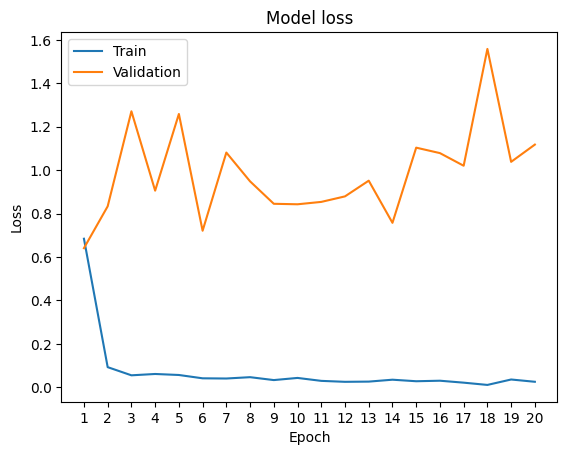

In [30]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values for all epochs
plt.plot(range(1, 21), history_One_c.history['accuracy'])
plt.plot(range(1, 21), history_One_c.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(range(1, 21))
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values for all epochs
plt.plot(range(1, 21), history_One_c.history['loss'])
plt.plot(range(1, 21), history_One_c.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(range(1, 21))
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [31]:
# Evaluation
y_pred = model.predict(X_val)
c_pred = np.argmax(y_pred, axis=1)

# Convert predictions back to original labels
c_pred_original = label_encoder.inverse_transform(c_pred)

# Print classification report
print(classification_report(y_val, c_pred_original))

50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step
                 precision    recall  f1-score   support

          COVID       0.76      0.78      0.77       271
   Lung_Opacity       0.71      0.92      0.80       451
         Normal       0.91      0.76      0.83       765
Viral Pneumonia       0.97      0.85      0.91       101

       accuracy                           0.81      1588
      macro avg       0.84      0.83      0.83      1588
   weighted avg       0.83      0.81      0.82      1588



- **two convolutional layers + the last three fully connected**

In [33]:
for layer in model.layers:
    layer.trainable=False

In [34]:
for layer in model.layers[-9:]:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
model.summary(show_trainable=True)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)           ┃ Output Shape         ┃      Param # ┃ Connected to        ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer            │ (None, 224, 224, 3)  │            0 │ -                   │    -    │
│ (InputLayer)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ Conv1 (Conv2D)         │ (None, 112, 112, 16) │          432 │ input_layer[0][0]   │    N    │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ bn_Conv1               │ (None, 112, 112, 16) │           64 │ Conv1[0][0]         │    N    │
│ (BatchNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ Conv1_relu (ReLU)      │ (None, 112, 112, 16) │            0 │ bn_Conv1[0][0]      │    -    │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ expanded_conv_depthwi… │ (None, 112, 112, 16) │          144 │ Conv1_relu[0][0]    │    N    │
│ (DepthwiseConv2D)      │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ expanded_conv_depthwi… │ (None, 112, 112, 16) │           64 │ expanded_conv_dept… │    N    │
│ (BatchNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ expanded_conv_depthwi… │ (None, 112, 112, 16) │            0 │ expanded_conv_dept… │    -    │
│ (ReLU)                 │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ expanded_conv_project  │ (None, 112, 112, 8)  │          128 │ expanded_conv_dept… │    N    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ expanded_conv_project… │ (None, 112, 112, 8)  │           32 │ expanded_conv_proj… │    N    │
│ (BatchNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block_1_expand         │ (None, 112, 112, 48) │          384 │ expanded_conv_proj… │    N    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block_1_expand_BN      │ (None, 112, 112, 48) │          192 │ block_1_expand[0][… │    N    │
│ (BatchNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block_1_expand_relu    │ (None, 112, 112, 48) │            0 │ block_1_expand_BN[… │    -    │
│ (ReLU)                 │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block_1_pad            │ (None, 113, 113, 48) │            0 │ block_1_expand_rel… │    -    │
│ (ZeroPadding2D)        │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block_1_depthwise      │ (None, 56, 56, 48)   │          432 │ block_1_pad[0][0]   │    N    │
│ (DepthwiseConv2D)    

 Total params: 2,544,820 (9.71 MB)

 Trainable params: 2,123,076 (8.10 MB)

 Non-trainable params: 421,744 (1.61 MB)

In [36]:
import time
start=time.time()
history_Two_c = model.fit(X_train,y_traine,validation_data=(X_val,y_vale),epochs=20,batch_size=64
)
end=time.time()
times=end-start
training_times.append(times)

Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 26s 247ms/step - accuracy: 0.9597 - loss: 0.1350 - val_accuracy: 0.3583 - val_loss: 9.6691
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.9758 - loss: 0.0718 - val_accuracy: 0.3111 - val_loss: 14.0771
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.9784 - loss: 0.0534 - val_accuracy: 0.6241 - val_loss: 5.3527
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.9750 - loss: 0.0888 - val_accuracy: 0.7028 - val_loss: 2.8460
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.9945 - loss: 0.0215 - val_accuracy: 0.6348 - val_loss: 4.8819
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.9730 - loss: 0.0794 - val_accuracy: 0.7720 - val_loss: 1.3115
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.9881 - loss: 0.0311 - val_accuracy: 0.6196 - val_loss: 3.9426
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.9881 - loss: 0.0417 - val_accuracy: 0.7764 

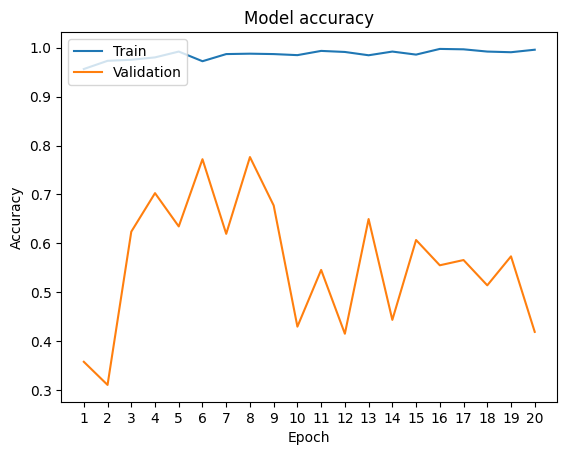

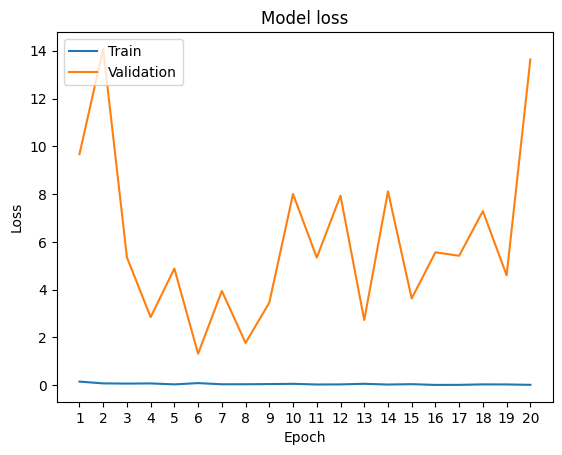

In [38]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values for all epochs
plt.plot(range(1, 21), history_Two_c.history['accuracy'])
plt.plot(range(1, 21), history_Two_c.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(range(1, 21))
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values for all epochs
plt.plot(range(1, 21), history_Two_c.history['loss'])
plt.plot(range(1, 21), history_Two_c.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(range(1, 21))
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [39]:
# Evaluation
y_pred = model.predict(X_val)
c_pred = np.argmax(y_pred, axis=1)

# Convert predictions back to original labels
c_pred_original = label_encoder.inverse_transform(c_pred)

# Print classification report
print(classification_report(y_val, c_pred_original))

50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step
                 precision    recall  f1-score   support

          COVID       0.56      0.81      0.66       271
   Lung_Opacity       0.35      0.88      0.50       451
         Normal       0.97      0.04      0.09       765
Viral Pneumonia       0.94      0.15      0.26       101

       accuracy                           0.42      1588
      macro avg       0.70      0.47      0.37      1588
   weighted avg       0.72      0.42      0.31      1588



In [41]:
import pandas as pd
from tabulate import tabulate

# Prepare data for the table
data = [
    ["Only the last 3 FC", 
     history_last_three_fc.history['accuracy'][-1], 
     history_last_three_fc.history['val_accuracy'][-1], 
     history_last_three_fc.history['loss'][-1], 
     history_last_three_fc.history['val_loss'][-1], 
     training_times[0]],
    ["The last Conv", 
     history_One_c.history['accuracy'][-1], 
     history_One_c.history['val_accuracy'][-1], 
     history_One_c.history['loss'][-1], 
     history_One_c.history['val_loss'][-1], 
     training_times[1]],
    ["The last 2 Conv", 
     history_Two_c.history['accuracy'][-1], 
     history_Two_c.history['val_accuracy'][-1], 
     history_Two_c.history['loss'][-1], 
     history_Two_c.history['val_loss'][-1], 
     training_times[2]]
]

# Define headers
headers = ["Model", "Training Accuracy", "Validation Accuracy", "Training Loss", "Validation Loss", "Training Time (s)"]

# Print the table with borders
print(tabulate(data, headers=headers, tablefmt="fancy_grid"))



╒════════════════════╤═════════════════════╤═══════════════════════╤═════════════════╤═══════════════════╤═════════════════════╕
│ Model              │   Training Accuracy │   Validation Accuracy │   Training Loss │   Validation Loss │   Training Time (s) │
╞════════════════════╪═════════════════════╪═══════════════════════╪═════════════════╪═══════════════════╪═════════════════════╡
│ Only the last 3 FC │            0.997029 │              0.868388 │       0.0108198 │          0.764598 │             98.5047 │
├────────────────────┼─────────────────────┼───────────────────────┼─────────────────┼───────────────────┼─────────────────────┤
│ The last Conv      │            0.990278 │              0.814232 │       0.0256406 │          1.11791  │             93.8622 │
├────────────────────┼─────────────────────┼───────────────────────┼─────────────────┼───────────────────┼─────────────────────┤
│ The last 2 Conv    │            0.995679 │              0.419395 │       0.0117113 │         13

# Segmentation 

In [10]:
import os
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split


gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


policy = tf.keras.mixed_precision.Policy('mixed_float16')
tf.keras.mixed_precision.set_global_policy(policy)

path = "/kaggle/input/COVID-19_Radiography_Dataset"
data_dir = os.path.join(path)
data_dir_tensor = tf.constant(data_dir)
batch_size = 16  
target_size = (128, 128)  # Reduced from 256

# Build dataframe with image-mask pairs
data = []
classes = ['Normal', 'COVID', 'Lung_Opacity', 'Viral Pneumonia']

for cls in classes:
    img_dir = os.path.join(data_dir, cls, 'images')
    mask_dir = os.path.join(data_dir, cls, 'masks')
    
    for img_file in os.listdir(img_dir):  
        img_path = os.path.join(cls, 'images', img_file)
        mask_path = os.path.join(cls, 'masks', img_file)
        if os.path.exists(os.path.join(data_dir, mask_path)):
            data.append([img_path, mask_path, cls])

df = pd.DataFrame(data, columns=['image_file', 'mask_file', 'class'])
train_df, val_df = train_test_split(df, test_size=0.3, stratify=df['class'], random_state=42)


def load_and_preprocess(img_path, mask_path):
    full_img_path = tf.strings.join([data_dir_tensor, img_path], separator='/')
    full_mask_path = tf.strings.join([data_dir_tensor, mask_path], separator='/')
    
    img = tf.io.read_file(full_img_path)
    img = tf.image.decode_png(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)  # Auto-scales to [0,1]
    
    mask = tf.io.read_file(full_mask_path)
    mask = tf.image.decode_png(mask, channels=1)
    mask = tf.image.convert_image_dtype(mask, tf.float32)
    
    img = tf.image.resize(img, target_size)
    mask = tf.image.resize(mask, target_size, method='nearest')
    
    return img, mask

train_dataset = tf.data.Dataset.from_tensor_slices(
    (train_df["image_file"], train_df["mask_file"])
).map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE
).batch(batch_size).prefetch(tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices(
    (val_df["image_file"], val_df["mask_file"])
).map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE
).batch(batch_size).prefetch(tf.data.AUTOTUNE)


def unet_model(input_shape=(128, 128, 3)):
    tf.keras.backend.clear_session()
    
    inputs = tf.keras.Input(shape=input_shape)
    
    c1 = tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same')(inputs)
    c1 = tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)
    
    c2 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(p1)
    c2 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
    
    c3 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(p2)
    c3 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(c3)
    
    u4 = tf.keras.layers.Conv2DTranspose(64, 2, strides=2, padding='same')(c3)
    u4 = tf.keras.layers.concatenate([u4, c2])
    c4 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(u4)
    c4 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(c4)
    
    u5 = tf.keras.layers.Conv2DTranspose(32, 2, strides=2, padding='same')(c4)
    u5 = tf.keras.layers.concatenate([u5, c1])
    c5 = tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same')(u5)
    c5 = tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same')(c5)
    
    outputs = tf.keras.layers.Conv2D(1, 1, activation='sigmoid', dtype='float32')(c5)
    
    return tf.keras.Model(inputs=inputs, outputs=outputs)

model = unet_model()
model.summary()


metrics = [
    tf.keras.metrics.BinaryIoU(target_class_ids=[1], name='iou'),
    tf.keras.metrics.BinaryAccuracy(name='acc'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.Precision(name='precision')
]

optimizer = tf.keras.mixed_precision.LossScaleOptimizer(
    tf.keras.optimizers.Adam(learning_rate=1e-3)
)

model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=metrics
)


class EpochTracker(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        print(f"\n>>> Starting Epoch {epoch+1}/20 <<<")
    
    def on_epoch_end(self, epoch, logs=None):
        print(f"\n Epoch {epoch+1} Complete ")
        print(f"Train Loss: {logs['loss']:.4f} | Val Loss: {logs['val_loss']:.4f}")
        print(f"IoU: {logs['iou']:.4f} | Val IoU: {logs['val_iou']:.4f}")
        print("--------------------------------------------------")

epoch_tracker = EpochTracker()

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,
    verbose=1,
    callbacks=[epoch_tracker]  
)

Physical devices cannot be modified after being initialized


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 128, 128, 32)   │            896 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 128, 128, 32)   │          9,248 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 64, 64, 32)     │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 64, 64, 64)     │         18,496 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 64, 64, 64)     │         36,928 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 32, 32, 64)     │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 32, 32, 128)    │         73,856 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 32, 32, 128)    │        147,584 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose          │ (None, 64, 64, 64)     │         32,832 │ conv2d_5[0][0]         │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 64, 64, 128)    │              0 │ conv2d_transpose[0][0… │
│                           │                        │                │ conv2d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 64, 64, 64)     │         73,792 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 64, 64, 64)     │         36,928 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_1        │ (None, 128, 128, 32)   │          8,224 │ conv2d_7[0][0]         │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 128, 128, 64)   │              0 │ conv2d_transpose_1[0]… │
│ (Concatenate)             │                        │                │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 128, 128, 32)   │         18,464 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)    

 Total params: 466,529 (1.78 MB)

 Trainable params: 466,529 (1.78 MB)

 Non-trainable params: 0 (0.00 B)


>>> Starting Epoch 1/20 <<<
Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - acc: 0.7630 - iou: 1.7863e-04 - loss: 0.5944 - precision: 0.0164 - recall: 1.8336e-04
★ Epoch 1 Complete ★
Train Loss: 0.5596 | Val Loss: 0.5166
IoU: 0.0001 | Val IoU: 0.0000
--------------------------------------------------
18/18 ━━━━━━━━━━━━━━━━━━━━ 31s 918ms/step - acc: 0.7631 - iou: 1.7201e-04 - loss: 0.5926 - precision: 0.0164 - recall: 1.7650e-04 - val_acc: 0.7675 - val_iou: 0.0000e+00 - val_loss: 0.5166 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00

>>> Starting Epoch 2/20 <<<
Epoch 2/20
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - acc: 0.7655 - iou: 0.0000e+00 - loss: 0.4868 - precision: 0.0000e+00 - recall: 0.0000e+00
★ Epoch 2 Complete ★
Train Loss: 0.4633 | Val Loss: 0.4191
IoU: 0.0000 | Val IoU: 0.0000
--------------------------------------------------
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - acc: 0.7655 - iou: 0.0000e+00 - loss: 0.4843 - precision: 0.0000e+00 - recall: 0.0000e+00 - val

### Evaluation

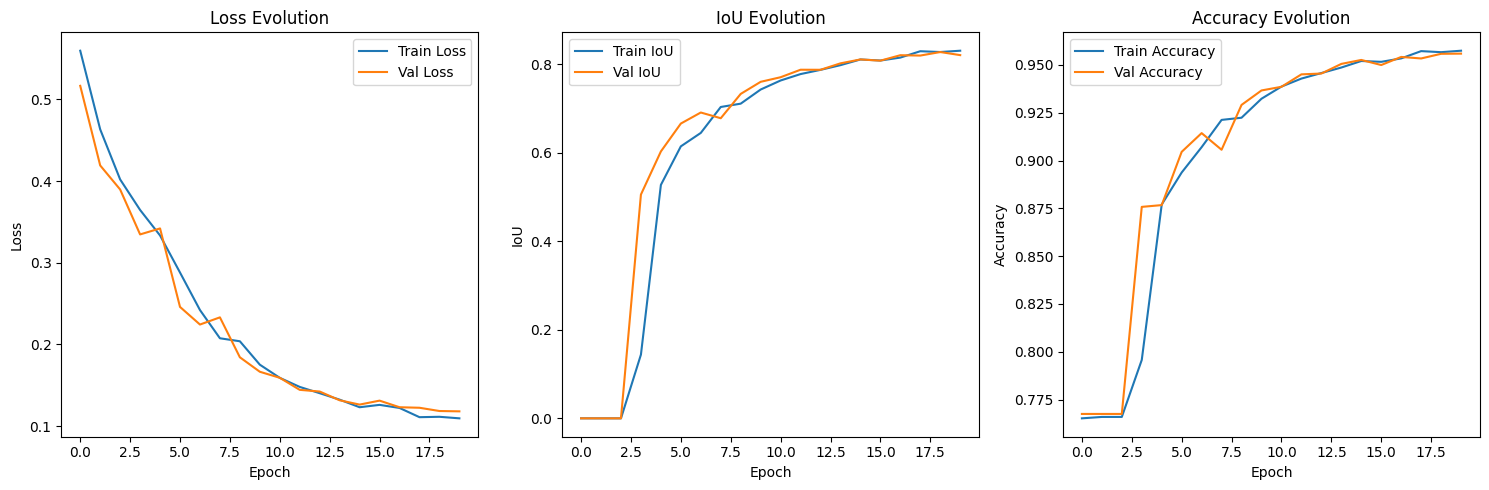


Final Validation Metrics:
F1-Score: 0.9013
Precision: 0.9392
Recall: 0.8664
IoU: 0.8204

Sample Predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


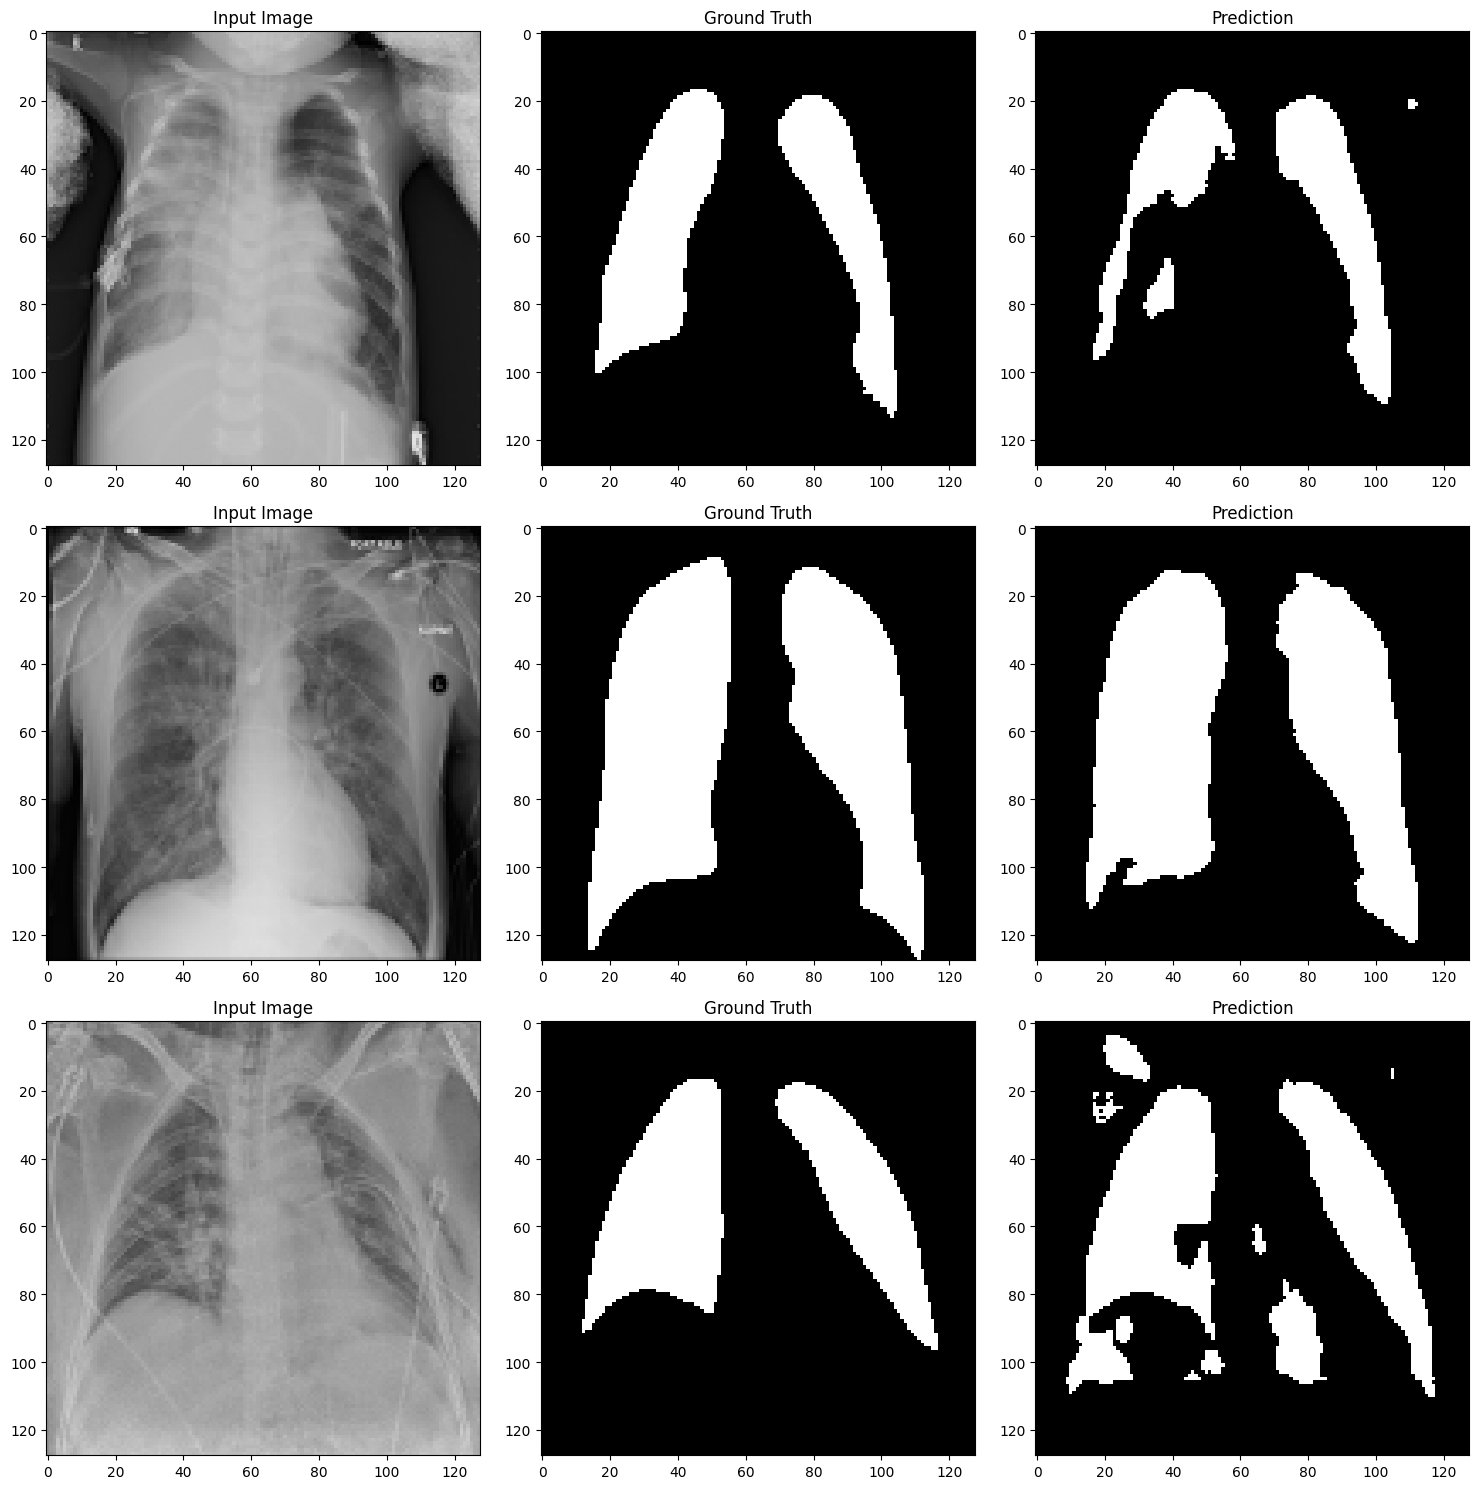

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Evolution')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history.history['iou'], label='Train IoU')
plt.plot(history.history['val_iou'], label='Val IoU')
plt.title('IoU Evolution')
plt.ylabel('IoU')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Val Accuracy')
plt.title('Accuracy Evolution')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()


val_precision = history.history["val_precision"][-1]  
val_recall = history.history["val_recall"][-1]        

val_f1 = 2 * (val_precision * val_recall) / (val_precision + val_recall + 1e-7)

print(f'\nFinal Validation Metrics:')
print(f'F1-Score: {val_f1:.4f}')
print(f'Precision: {val_precision:.4f}')
print(f'Recall: {val_recall:.4f}')
print(f'IoU: {history.history["val_iou"][-1]:.4f}')


def visualize_predictions(dataset, model, num_samples=3):
    for images, masks in dataset.take(1):
        preds = model.predict(images)
        preds = (preds > 0.5).astype(np.float32)  
        
        plt.figure(figsize=(15, 5*num_samples))
        for i in range(num_samples):
            # Original Image
            plt.subplot(num_samples, 3, 3*i+1)
            plt.imshow(images[i].numpy())
            plt.title('Input Image')
            
            # True Mask
            plt.subplot(num_samples, 3, 3*i+2)
            plt.imshow(masks[i].numpy().squeeze(), cmap='gray')
            plt.title('Ground Truth')
            
            # Prediction
            plt.subplot(num_samples, 3, 3*i+3)
            plt.imshow(preds[i].squeeze(), cmap='gray')
            plt.title('Prediction')
            
        plt.tight_layout()
        plt.show()

print('\nSample Predictions:')
visualize_predictions(val_dataset, model)

In [12]:
def get_classification_report(model, dataset):
    y_true = []
    y_pred = []
    
    for images, masks in dataset:
        preds = model.predict(images)
        y_true.extend(masks.numpy().flatten())
        y_pred.extend((preds > 0.5).astype(np.float32).flatten())
    
    print(classification_report(y_true, y_pred, target_names=['Background', 'Foreground']))

print('\nFull Classification Report:')
get_classification_report(model, val_dataset)


Full Classification Report:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
              precision    recall  f1-score   support

  Background       0.96      0.98      0.97   1508921
  Foreground       0.94      0.87      0.90    457159

    accuracy                           0.96   1966080
   macro avg       0.95      0.92      0.94   1966080
weighted avg       0.96      0.96      0.96   1966080

